In [15]:
import torch
import matplotlib.pyplot as plt
from dataset import MNISTDataset, MNISTFlowDataset

In [16]:
train_set = MNISTFlowDataset(path='data/MNIST/latent')

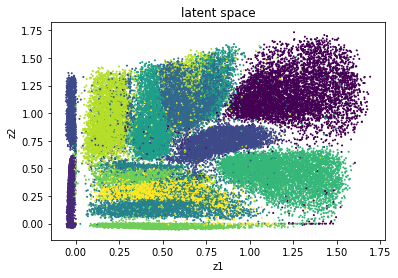

In [12]:
show_z(train_set.dataset, train_set.labels)

In [17]:
flow_model = torch.load('trained_models/mnist_flow_zdim_2.model')

In [32]:
flow_model = flow_model.to('cuda')
flow_model.eval()
train_set.dataset = train_set.dataset.to('cuda')
y, log_det = flow_model.forward(train_set.dataset[0:10000])

In [33]:
y.to('cpu')

tensor([[-0.1901,  0.6164],
        [ 1.4880,  0.7815],
        [-0.0936, -0.8687],
        ...,
        [ 1.0761, -1.0948],
        [ 0.3848, -0.3503],
        [-0.0781, -0.9358]], grad_fn=<CopyBackwards>)

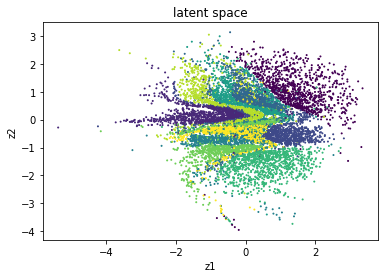

In [34]:
show_z(y.detach().cpu(), train_set.labels[0:10000])

In [11]:
def show_z(samples, labels, fname=None, title='latent space'):
    plt.figure()
    plt.title(title)
    plt.scatter(samples[:, 0], samples[:, 1], s=1, c=labels)
    plt.xlabel('z1')
    plt.ylabel('z2')
    if fname:
        # TODO: save the figure in file
        pass
    

In [13]:
ae = torch.load('trained_models/mnist_ae_zdim_2.model')

ae.eval()
ae = ae.to('cpu')

ae_set = MNISTDataset(path='data/MNIST/processed',train=False, normalize=True)

latent = ae.encoder(ae_set.dataset.unsqueeze(dim=1))
lat = latent.detach().clone()

torch.save((lat, ae_set.labels), 'data/MNIST/latent/test.pt')

/scratch/sagar/Projects/flow/ae_flow/dataset.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dataset = torch.tensor(self.dataset, dtype=torch.float32)


AttributeError: 'Flow' object has no attribute 'encoder'